# 第 9 章第 2 节-实例：文档分类

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [1]:
from time import time
from sklearn.datasets import load_files

import os

print("loading train dataset ...（下载训练数据集）")
t = time()

# os.makedirs('./datasets/mlcomp/379/train')
news_train = load_files('../input/mlcomp/379/train')
print('end')
print("summary: {0} documents in {1} categories.".format(len(news_train.data), len(news_train.target_names)))
print("done in {0} seconds".format(time() - t))

loading train dataset ...（下载训练数据集）
end
summary: 13180 documents in 20 categories.
done in 0.610205888748169 seconds


+ 把这些文档全部转换成由 TF-IDF 表达的权重信息构成的向量。

In [2]:
type(news_train)

sklearn.utils.Bunch

In [3]:
dir(news_train)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [4]:
len(news_train.data)

13180

In [5]:
print(news_train.data[0])

b'From: demon@desire.wright.edu (Not a Boomer)\nSubject: The real source of trouble in the US health care system\n\n\tCancel private health insurance?\n\n\tWhen government care that only covers 20% of the population consumes\n42% of the spending for health care?\n\n\tNOT!\n\n\tNational Health Expenditures: 1960 to 1990\n(Includes Puerto Rico and outlying areas.)\n\nYear\tHealth Services and Supplies ($billions)\n\tPrivate\t\tPublic\n====================================\n1960\t$19.8\t\t$5.7\t(22% of total)\n1970\t$44.1\t\t$24.9\t(56% of total)\n1980\t$140.7\t\t$98.1\t(41% of total)\n1990\t$374.8\t\t$268.6\t(42% of total)\n\n[Source: American Almanac, Page 97.  1992-3 Edition]\n\n\tNow you understand where most of that 12.2% of GNP is going--to waste.\n\n\tBy these figures, private insurance is spending 58% of the money to\ncover 4 times as many people.\n\n\tGo figure.\n\nBrett\n________________________________________________________________________________\n\t"There\'s nothing so passi

In [6]:
np.unique(news_train.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 开始向量化文档
t = time()
vectorizer = TfidfVectorizer(encoding='latin-1')
# 转换成元组又是为什么
# X_train = vectorizer.fit_transform((d for d in news_train.data))
X_train = vectorizer.fit_transform(news_train.data)
print("n_samples: %d, n_features: %d" % X_train.shape)
# 查看非零元素的个数
print("number of non-zero features in sample [{0}]: {1}".format(news_train.filenames[0], X_train[0].getnnz()))
print("done in {0} seconds".format(time() - t))

n_samples: 13180, n_features: 130274
number of non-zero features in sample [../input/mlcomp/379/train/talk.politics.misc/17860-178992]: 108
done in 3.6371548175811768 seconds


In [8]:
# Number of stored values, including explicit zeros.
# explicit
X_train[0].getnnz()

108

+ alpha 表示平滑参数，其值越小，越容易过拟合；值太大，容易欠拟合。

In [9]:
from sklearn.naive_bayes import MultinomialNB
# MultinomialNB 表示多项式朴素贝叶斯
print("traning models ...".format(time() - t))
t = time()
y_train = news_train.target
clf = MultinomialNB(alpha=0.0001)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
print("train score: {0}".format(train_score))
print("done in {0} seconds".format(time() - t))
# 在训练数据集上的效果还是很不错的。

traning models ...
train score: 0.9978755690440061
done in 0.24146080017089844 seconds


In [11]:
print("loading test dataset ...")
t = time()
news_test = load_files('../input/mlcomp/379/test')
print("summary: {0} documents in {1} categories.".format(len(news_test.data), len(news_test.target_names)))
print("done in {0} seconds".format(time() - t))

loading test dataset ...
summary: 5648 documents in 20 categories.
done in 1.022801160812378 seconds


+ 对于测试数据集，同样也要进行向量化
+ IDF：逆向文档频率指数

In [12]:
print("vectorizing test dataset ...")
t = time()
# X_test = vectorizer.transform((d for d in news_test.data))
X_test = vectorizer.transform(news_test.data)
y_test = news_test.target
print("n_samples: %d, n_features: %d" % X_test.shape)
print("number of non-zero features in sample [{0}]: {1}".format(
    news_test.filenames[0], X_test[0].getnnz()))
print("done in %fs" % (time() - t))

vectorizing test dataset ...
n_samples: 5648, n_features: 130274
number of non-zero features in sample [../input/mlcomp/379/test/rec.autos/7429-103268]: 61
done in 1.451191s


In [13]:
pred = clf.predict(X_test[0])
print("predict: {0} is in category {1}".format(
    news_test.filenames[0], news_test.target_names[pred[0]]))
print("actually: {0} is in category {1}".format(
    news_test.filenames[0], news_test.target_names[news_test.target[0]]))

predict: ../input/mlcomp/379/test/rec.autos/7429-103268 is in category rec.autos
actually: ../input/mlcomp/379/test/rec.autos/7429-103268 is in category rec.autos


In [14]:
print("predicting test dataset ...")
t = time()
pred = clf.predict(X_test)
print("done in %fs" % (time() - t))

predicting test dataset ...
done in 0.032523s


In [15]:
from sklearn.metrics import accuracy_score

# 真实值，预测值
accuracy_score(y_test,pred)

0.9088172804532578

In [16]:
from sklearn.metrics import classification_report

print("classification report on test set for classifier:")
print(clf)
print(classification_report(y_test, pred,target_names=news_test.target_names))

classification report on test set for classifier:
MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)
                          precision    recall  f1-score   support

             alt.atheism       0.90      0.91      0.91       245
           comp.graphics       0.80      0.90      0.85       298
 comp.os.ms-windows.misc       0.82      0.79      0.80       292
comp.sys.ibm.pc.hardware       0.81      0.80      0.81       301
   comp.sys.mac.hardware       0.90      0.91      0.91       256
          comp.windows.x       0.88      0.88      0.88       297
            misc.forsale       0.87      0.81      0.84       290
               rec.autos       0.92      0.93      0.92       324
         rec.motorcycles       0.96      0.96      0.96       294
      rec.sport.baseball       0.97      0.94      0.96       315
        rec.sport.hockey       0.96      0.99      0.98       302
               sci.crypt       0.95      0.96      0.95       297
         sci.electronics     

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred)
print(cm)

[[224   0   0   0   0   0   0   0   0   0   0   0   0   0   2   5   0   0
    1  13]
 [  1 267   5   5   2   8   1   1   0   0   0   2   3   2   1   0   0   0
    0   0]
 [  1  13 230  24   4  10   5   0   0   0   0   1   2   1   0   0   0   0
    1   0]
 [  0   9  21 242   7   2  10   1   0   0   1   1   7   0   0   0   0   0
    0   0]
 [  0   1   5   5 233   2   2   2   1   0   0   3   1   0   1   0   0   0
    0   0]
 [  0  20   6   3   1 260   0   0   0   2   0   1   0   0   2   0   2   0
    0   0]
 [  0   2   5  12   3   1 235  10   2   3   1   0   7   0   2   0   2   1
    4   0]
 [  0   1   0   0   1   0   8 300   4   1   0   0   1   2   3   0   2   0
    1   0]
 [  0   1   0   0   0   2   2   3 283   0   0   0   1   0   0   0   0   0
    1   1]
 [  0   1   1   0   1   2   1   2   0 297   8   1   0   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   2   2 298   0   0   0   0   0   0   0
    0   0]
 [  0   1   2   0   0   1   1   0   0   0   0 284   2   1   0   0

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


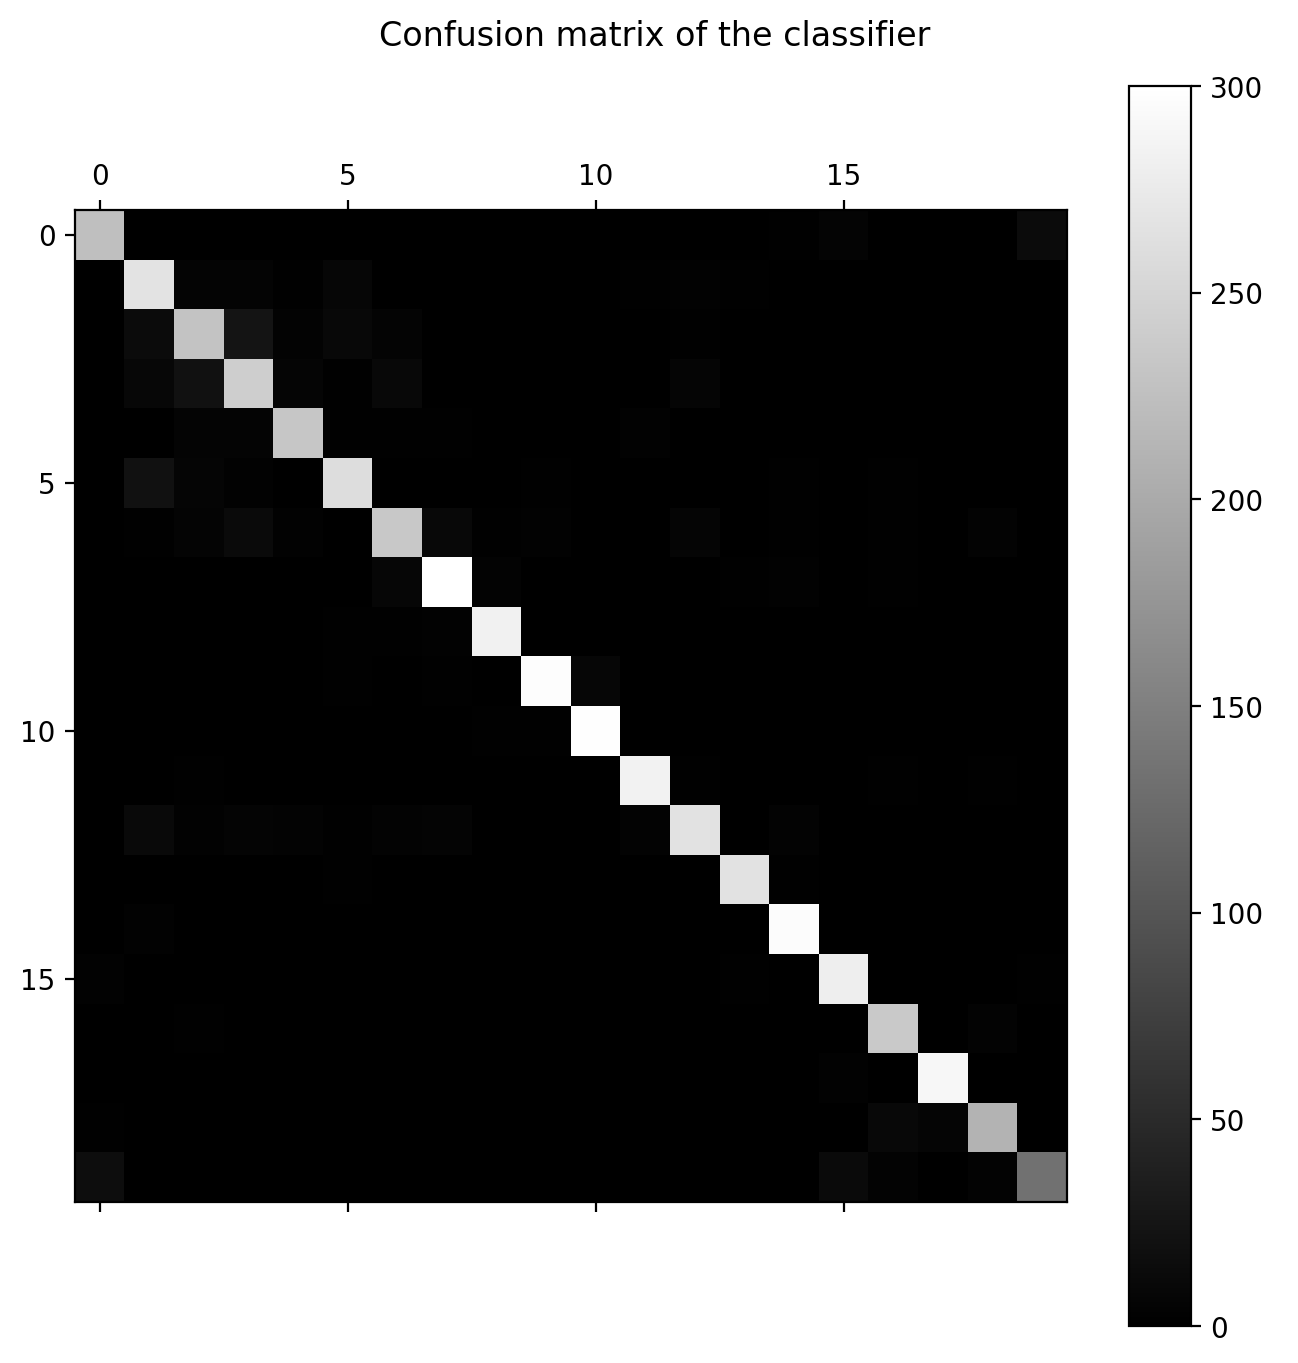

In [18]:
# Show confusion matrix
plt.figure(figsize=(8, 8), dpi=100)
plt.title('Confusion matrix of the classifier')
ax = plt.gca()                                  
ax.spines['right'].set_color('none')            
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.matshow(cm, fignum=1, cmap='gray')
plt.colorbar();

+ 鸢尾花的数据还可以用朴素贝叶斯来分类

+ 特征值是连续的时候的分类问题

## 鸢尾花就要使用高斯贝叶斯

In [19]:
# 假设特征呈正态分布

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
gnb = GaussianNB()
gnb.fit(iris.data, iris.target)
y_pred = gnb.predict(iris.data)
accuracy_score(iris.target, y_pred)

0.96